## Implementing of the Polynomial Regression with Ordinary Least Squares Method

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(0)
X= 2-3*np.random.normal(0., 1., 400)
y= X-4*(X**2) +.5*(X**3) + np.random.normal(-5., 5., 400)

Polynomial regression just works for the column matrix , (x,1) shape format 

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

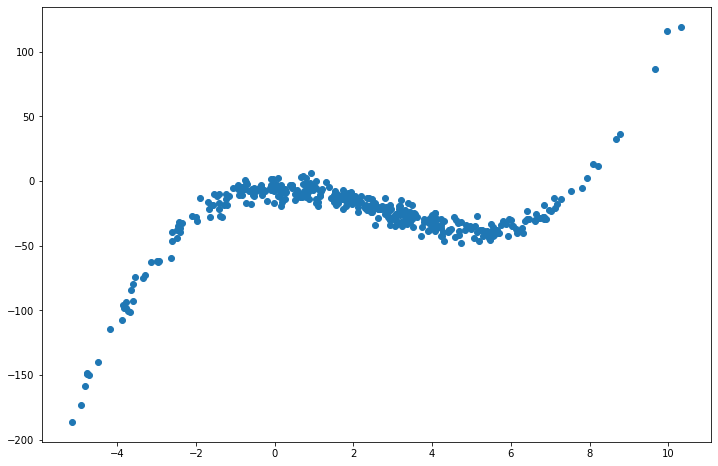

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(X,y)

In [5]:
from PIL import Image

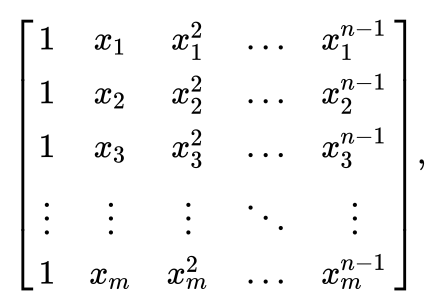

In [6]:
Image.open("Figures/vmatrix.png")

**Vandarmonde Matrix**

x^0,x^1,x^2 ; for the k=n, degree is n-1 because of x^0=1.

### Applying the Ordinary Least Squares 

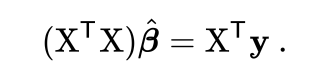

In [7]:
Image.open("Figures/ols.png")

According to the OLS method, both sides of the equation have to multiply with X.transpose(). The reason of the operation is finding weights. In this equation, weights equals to the beta_vector. 
beta_vector refers to beta values of the y=x_1*beta_1 + x_2*beta_2 ... +x_n*beta_n equation

* left : left side of the equation which is at the above 
* right : right side the of the equation which is at the above
* beta_vector (b^) : intercept and coefs in order 

In [10]:
class PolynomialFeatures_mine():
    
    """
    Generate polynomial and interaction features.

    Generate a new feature matrix consisting of all polynomial combinations
    of the features with degree less than or equal to the specified degree.
    For example, if an input sample is two dimensional and of the form
    [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
    
    Hyperparameters::
    
        degree: int
        Determines degree of the polynomial
    
    """
    
    def __init__(self,degree):
        
        self.degree=degree
        
    def fit_transform(self,arg=np.array):
        
        return arg.reshape(-1,1)**np.arange(self.degree+1)
        

In [10]:
class LinearRegression_mine():
   
    """
    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, …, wp) to 
    minimize the residual sum of squares between the observed targets in the dataset, 
    and the targets predicted by the linear approximation.

    Hyperparameters::

        positive: bool,default=False
        When set to True, forces the coefficients to be positive. 
        This option is only supported for dense arrays.
        
        weights : array, default=None
        
        To view weights 
        
    Attributes::
    
        coef_ : numpy array
 
        Coefficent of the linear fit.
        
        intercept : int 
        
        Intercept of the linear fit.
     """
    

    def __init__(self,positive=False,weights=None):
        
        self.positive=positive
        self.weights=weights
        self.coef_=None
        self.intercept_=None
        
    
    def ordinary_least_squares(self,X,y):
        
        left=np.dot(X.transpose(),X)
        right=np.dot(X.transpose(),y)
        weights=np.linalg.solve(left,right)
        
        if self.positive==True:
            
            return abs(weights)
    
        
        self.intercept_=weights[0]
        self.coef_=weights[1:]
        
        return weights
    
    
    def fit(self,X,y):
        
        self.weights=self.ordinary_least_squares(X,y)
        
        
    def predict(self,X):
        
        yhat=np.dot(X,self.weights).reshape(-1,1)
            
        return yhat
        
               

### Determining of the Degree of the Polynomial 

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

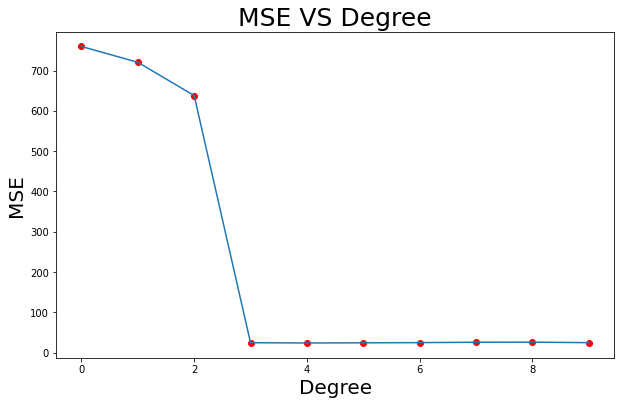

degree should be : 5


In [12]:
training_error=np.zeros(10)
cross_validation_error=np.zeros(10)

for d in range(10):
    
  
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(X_train.reshape(-1,1))
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(X_test.reshape(-1,1))
    
    model=LinearRegression(fit_intercept=True)
    model=model.fit(x_poly_train,y_train)
    
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    
    cve=cross_validate(model,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=6,return_train_score=True)
    
    training_error[d]=mse_train
    cross_validation_error[d]=np.mean(np.absolute(cve['test_score']))
    
    
       
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(range(10),cross_validation_error)
ax.scatter(range(10),cross_validation_error,color='red')
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Degree',fontsize=25)
plt.show()
print('degree should be :',cross_validation_error.argmin()+1)

In [13]:
cross_validation_error

array([759.79202978, 720.50598026, 637.93273002,  24.54003892,
        23.87247727,  24.2523791 ,  24.7509923 ,  25.65825702,
        25.89139619,  24.65334292])

### Comparing Results with Sklearn.LinearRegression

#### Sklearn Results

In [14]:
from sklearn.metrics import r2_score

In [15]:
X_train_poly= PolynomialFeatures(degree=5).fit_transform(X_train.reshape(-1,1))
X_test_poly=PolynomialFeatures(degree=5).fit_transform(X_test.reshape(-1,1))

In [16]:
model=LinearRegression()

In [17]:
%time model.fit(X_train_poly, y_train)

CPU times: user 2.41 ms, sys: 345 µs, total: 2.75 ms
Wall time: 2.53 ms


LinearRegression()

In [18]:
model.coef_,model.intercept_

(array([ 0.00000000e+00,  1.45051793e+00, -4.11839688e+00,  4.76353920e-01,
         5.59299032e-03, -1.43315574e-04]),
 -5.7559498255393216)

In [19]:
yhat_sklearn=model.predict(X_test_poly)

In [20]:
r2_score(y_test,yhat_sklearn)

0.9667529087808914

In [21]:
sorted_sklearn=np.array([(k,j) for k,j in sorted(zip(X_test,yhat_sklearn))])

Text(0, 0.5, 'Variables')

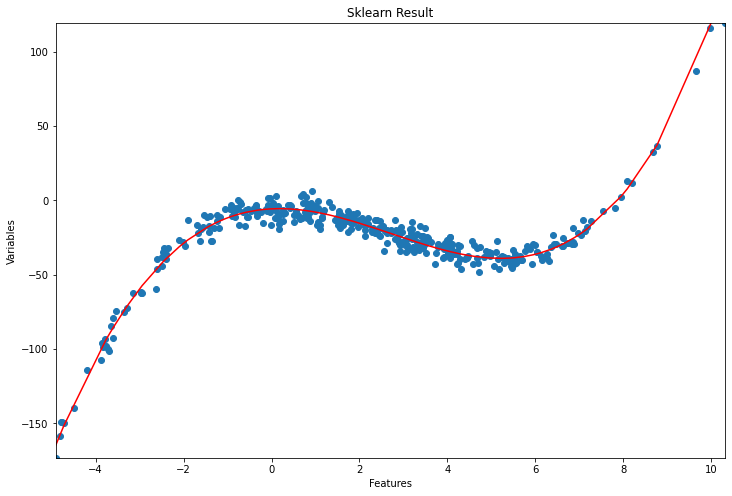

In [25]:
fig=plt.figure(figsize=(12,8))
plt.plot(sorted_sklearn[:,0],sorted_sklearn[:,1],'r')
plt.scatter(X,y)
plt.axis([X_test.min(),X_test.max(),y_test.min(),y_test.max()])
plt.title('Sklearn Result')
plt.xlabel('Features')
plt.ylabel('Variables')

#### Hand-made Results

In [26]:
X_train_poly=PolynomialFeatures_mine(degree=5).fit_transform(X_train)
X_test_poly=PolynomialFeatures_mine(degree=5).fit_transform(X_test)

In [27]:
model=LinearRegression_mine()  

In [28]:
model.ordinary_least_squares(X_train_poly,y_train)

array([-5.75594983e+00,  1.45051793e+00, -4.11839688e+00,  4.76353920e-01,
        5.59299032e-03, -1.43315574e-04])

In [29]:
model.fit(X_train_poly,y_train)

In [30]:
model.coef_,model.intercept_

(array([ 1.45051793e+00, -4.11839688e+00,  4.76353920e-01,  5.59299032e-03,
        -1.43315574e-04]),
 -5.755949825541662)

In [31]:
yhat_mine=model.predict(X_test_poly)

In [32]:
r2_score(y_test,yhat_mine)

0.9667529087809025

In [33]:
sorted_mine=np.array([(k,j) for k,j in sorted(zip(X_test,yhat_mine.ravel()))])

Text(0, 0.5, 'Variables')

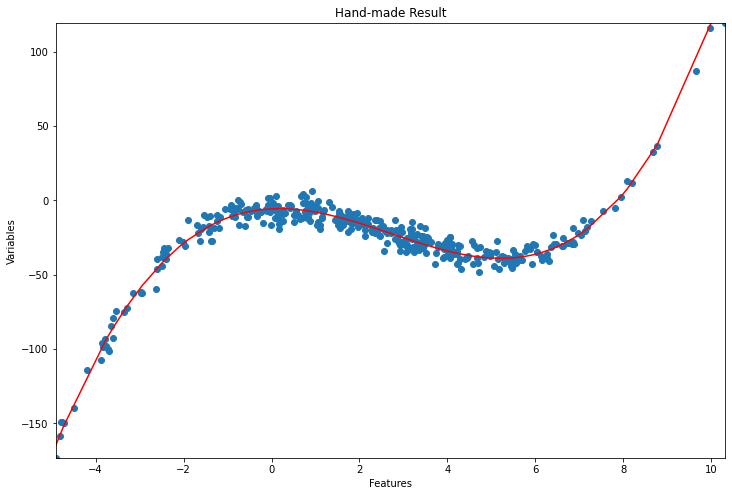

In [36]:
fig=plt.figure(figsize=(12,8))
plt.plot(sorted_mine[:,0],sorted_mine[:,1],'r')
plt.scatter(X,y)
plt.axis([X_test.min(),X_test.max(),y_test.min(),y_test.max()])
plt.title('Hand-made Result')
plt.xlabel('Features')
plt.ylabel('Variables')